In [1]:
# Linear Algebra
import numpy as np

# Data Preprocessing
import pandas as pd

# Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("/Users/shauryaluthra/Desktop/Projects/Iris/Iris.csv") # Loading the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
# We can clearly see all the data is present and there are no null values only one of them is a non numeric data type
# and we'll convert that to numeric data

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Removing Id column from dataset
data = data.drop('Id', axis = 1)

In [8]:
# Now we'll visualize the data

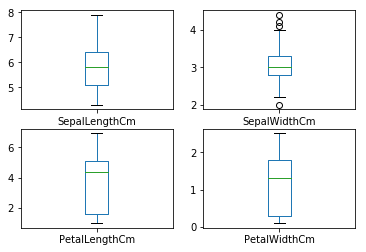

In [9]:
# box and whisker plots
data.plot(kind = 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False)
plt.show()

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


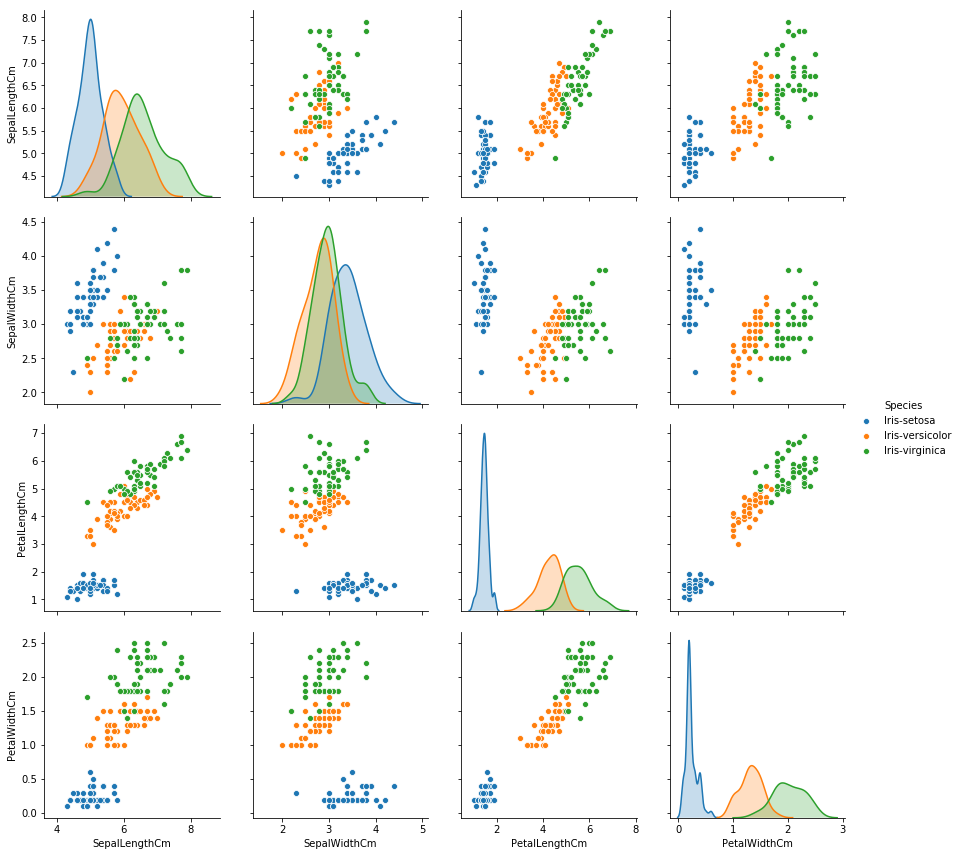

In [10]:
sns.pairplot(data, hue = "Species", size = 3, diag_kind = "kde")
plt.show()

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


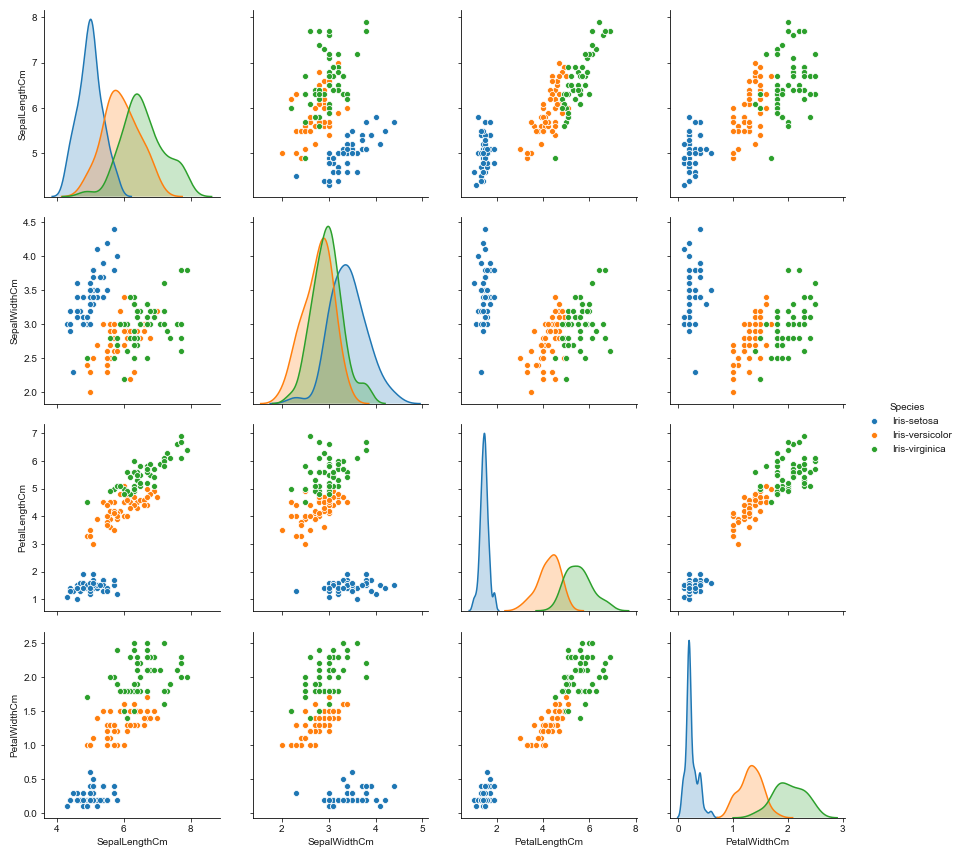

In [11]:
sns.pairplot(data, hue = "Species", size = 3)
sns.set()

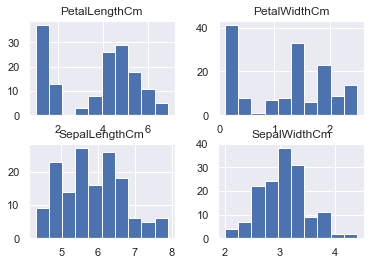

In [12]:
# histograms
data.hist()
plt.show()

In [13]:
#data['Species'].unique()

In [14]:
#data['Species'].value_counts()

In [15]:
#species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
#data['Species'] = data['Species'].map(species)

In [16]:
# We have converted species from a non numeric to numeric 

In [17]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data['SepalLengthCm'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [20]:
# We'll convert SepalLengthCm into different categories
# min value of speal length is 4.3 and max value is 7.9

In [21]:
data['SepalLengthCm'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: SepalLengthCm, dtype: int64

In [22]:
data.loc[(data['SepalLengthCm'] >= 4) & (data['SepalLengthCm'] < 5), 'SepalLengthCm'] = 0
data.loc[(data['SepalLengthCm'] >= 5) & (data['SepalLengthCm'] < 6), 'SepalLengthCm'] = 1
data.loc[(data['SepalLengthCm'] >= 6) & (data['SepalLengthCm'] < 7), 'SepalLengthCm'] = 2
data.loc[(data['SepalLengthCm'] >= 7) & (data['SepalLengthCm'] <= 8), 'SepalLengthCm'] = 3

In [23]:
data['SepalLengthCm'] = data['SepalLengthCm'].astype(int)

In [24]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,3.5,1.4,0.2,Iris-setosa
1,0,3.0,1.4,0.2,Iris-setosa
2,0,3.2,1.3,0.2,Iris-setosa
3,0,3.1,1.5,0.2,Iris-setosa
4,1,3.6,1.4,0.2,Iris-setosa


In [25]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,2,3.0,5.2,2.3,Iris-virginica
146,2,2.5,5.0,1.9,Iris-virginica
147,2,3.0,5.2,2.0,Iris-virginica
148,2,3.4,5.4,2.3,Iris-virginica
149,1,3.0,5.1,1.8,Iris-virginica


In [26]:
# This shows SepalLengthCm has been converted into various categories now we'll convert SepalWidthCm into various 
# categories

In [27]:
data['SepalWidthCm'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

In [28]:
# Clearly minimum value of SepalWidthCm is 2 and max value is 4.4

In [29]:
data['SepalWidthCm'].value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: SepalWidthCm, dtype: int64

In [30]:
data.loc[(data['SepalWidthCm'] >= 2) & (data['SepalWidthCm'] <= 2.5), 'SepalWidthCm'] = 0
data.loc[(data['SepalWidthCm'] >= 2.6) & (data['SepalWidthCm'] < 3), 'SepalWidthCm'] = 1
data.loc[data['SepalWidthCm'] == 3, 'SepalWidthCm'] = 2
data.loc[(data['SepalWidthCm'] > 3) & (data['SepalWidthCm'] <= 3.3), 'SepalWidthCm'] = 3
data.loc[(data['SepalWidthCm'] > 3.3) & (data['SepalWidthCm'] <= 4.4), 'SepalWidthCm'] = 4

In [31]:
data['SepalWidthCm'] = data['SepalWidthCm'].astype(int)

In [32]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4,1.4,0.2,Iris-setosa
1,0,2,1.4,0.2,Iris-setosa
2,0,3,1.3,0.2,Iris-setosa
3,0,3,1.5,0.2,Iris-setosa
4,1,4,1.4,0.2,Iris-setosa


In [33]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,2,2,5.2,2.3,Iris-virginica
146,2,0,5.0,1.9,Iris-virginica
147,2,2,5.2,2.0,Iris-virginica
148,2,4,5.4,2.3,Iris-virginica
149,1,2,5.1,1.8,Iris-virginica


In [34]:
# SepalWidthCm has been converted into various categories and now we'll convert PetalLengthCm into various categories

In [35]:
data['PetalLengthCm'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

In [36]:
# The minimum value of PetalLengthCm is 1 and the max value is 6.9

In [37]:
data['PetalLengthCm'].value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: PetalLengthCm, dtype: int64

In [38]:
#data[(data['PetalLengthCm'] >= 1) & (data['PetalLengthCm'] < 1.5)].count() # 23 values b/w 1 and 1.5
#data[(data['PetalLengthCm'] >= 1.5) & (data['PetalLengthCm'] < 3)].count() # 27 values b/w 1.5 and 3
#data[(data['PetalLengthCm'] >= 3) & (data['PetalLengthCm'] < 4.4)].count() # 25 values b/w 3 and 4.4
#data[(data['PetalLengthCm'] >= 4.4) & (data['PetalLengthCm'] < 5)].count() # 29 values b/w 4.4 and 5
#data[(data['PetalLengthCm'] >= 5) & (data['PetalLengthCm'] < 5.8)].count() # 30 values b/w 5 and 5.8
#data[(data['PetalLengthCm'] >= 5.8) & (data['PetalLengthCm'] < 7)].count() # 16 values b/w 6 and 7

In [39]:
# As seen from above we'll divide PetalLengthCm into 6 categories

In [40]:
data.loc[(data['PetalLengthCm'] >= 1) & (data['PetalLengthCm'] < 1.5), 'PetalLengthCm'] = 0
data.loc[(data['PetalLengthCm'] >= 1.5) & (data['PetalLengthCm'] < 3), 'PetalLengthCm'] = 1
data.loc[(data['PetalLengthCm'] >= 3) & (data['PetalLengthCm'] < 4.4), 'PetalLengthCm'] = 2
data.loc[(data['PetalLengthCm'] >= 4.4) & (data['PetalLengthCm'] < 5), 'PetalLengthCm'] = 3
data.loc[(data['PetalLengthCm'] >= 5) & (data['PetalLengthCm'] < 5.8), 'PetalLengthCm'] = 4
data.loc[(data['PetalLengthCm'] >= 5.8) & (data['PetalLengthCm'] < 7), 'PetalLengthCm'] = 5

In [41]:
data['PetalLengthCm'] = data['PetalLengthCm'].astype(int)

In [42]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4,0,0.2,Iris-setosa
1,0,2,0,0.2,Iris-setosa
2,0,3,0,0.2,Iris-setosa
3,0,3,1,0.2,Iris-setosa
4,1,4,0,0.2,Iris-setosa


In [43]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,2,2,4,2.3,Iris-virginica
146,2,0,4,1.9,Iris-virginica
147,2,2,4,2.0,Iris-virginica
148,2,4,4,2.3,Iris-virginica
149,1,2,4,1.8,Iris-virginica


In [44]:
# PetalLengthCm has been converted into various categories and now we'll convert PetalWidthCm into various categories

In [45]:
data['PetalWidthCm'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64

In [46]:
# Clearly the min value of PetalWidthCm is 0.1 and the max value of PetalWidthCm is 2.5

In [47]:
data['PetalWidthCm'].value_counts()

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

In [48]:
#data[(data['PetalWidthCm'] >= 0.1) & (data['PetalWidthCm'] < 0.3)].count() # 34 values 
#data[(data['PetalWidthCm'] >= 0.3) & (data['PetalWidthCm'] < 1.2)].count() # 26 values
#data[(data['PetalWidthCm'] >= 1.2) & (data['PetalWidthCm'] < 1.5)].count() # 26 values
#data[(data['PetalWidthCm'] >= 1.5) & (data['PetalWidthCm'] < 2)].count() # 35 values
#data[(data['PetalWidthCm'] >= 2) & (data['PetalWidthCm'] < 2.5)].count() # 26 values

In [49]:
# As seen from above we'll divide PetalWidthCm into 5 categories

In [50]:
data.loc[(data['PetalWidthCm'] >= 0.1) & (data['PetalWidthCm'] < 0.3), 'PetalWidthCm'] = 0
data.loc[(data['PetalWidthCm'] >= 0.3) & (data['PetalWidthCm'] < 1.2), 'PetalWidthCm'] = 1
data.loc[(data['PetalWidthCm'] >= 1.2) & (data['PetalWidthCm'] < 1.5), 'PetalWidthCm'] = 2
data.loc[(data['PetalWidthCm'] >= 1.5) & (data['PetalWidthCm'] < 2), 'PetalWidthCm'] = 3
data.loc[(data['PetalWidthCm'] >= 2) & (data['PetalWidthCm'] < 2.5), 'PetalWidthCm'] = 4

In [51]:
data['PetalWidthCm'] = data['PetalWidthCm'].astype(int)

In [52]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4,0,0,Iris-setosa
1,0,2,0,0,Iris-setosa
2,0,3,0,0,Iris-setosa
3,0,3,1,0,Iris-setosa
4,1,4,0,0,Iris-setosa


In [53]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,2,2,4,4,Iris-virginica
146,2,0,4,3,Iris-virginica
147,2,2,4,4,Iris-virginica
148,2,4,4,4,Iris-virginica
149,1,2,4,3,Iris-virginica


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null int64
SepalWidthCm     150 non-null int64
PetalLengthCm    150 non-null int64
PetalWidthCm     150 non-null int64
Species          150 non-null object
dtypes: int64(4), object(1)
memory usage: 5.9+ KB


In [55]:
# Clearly all columns have been converted to int values

In [56]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,1.386667,2.180000,2.426667,2.300000
std,0.841752,1.380934,1.606809,1.620962
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.500000,3.000000
75%,2.000000,3.000000,4.000000,4.000000
max,3.000000,4.000000,5.000000,4.000000


In [57]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4,0,0,Iris-setosa
1,0,2,0,0,Iris-setosa
2,0,3,0,0,Iris-setosa
3,0,3,1,0,Iris-setosa
4,1,4,0,0,Iris-setosa


In [58]:
data.sample(5) # pops up 5 random rows from the data set

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
66,1,2,3,3,Iris-versicolor
76,2,1,3,4,Iris-versicolor
79,1,1,2,1,Iris-versicolor
24,0,4,1,0,Iris-setosa
72,2,0,3,3,Iris-versicolor


In [59]:
# For making predictions we need to split our data

array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

# We have splited the loaded dataset into two, 70% of which we will use to train our models and 30% that we will hold
# back as a validation dataset.

In [60]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [61]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_validation)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [62]:
# KNN(k nearest neighbours)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [63]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_validation)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [64]:
# Perceptron
perceptron = Perceptron(max_iter = 5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_validation)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [65]:
# Linear Support Vector Machine(SVM)
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_validation)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [66]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_validation)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [67]:
# Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_validation)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [68]:
# Now we'll see which is the best model from the above models
results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Stochastic Gradient Descent', 'Naive Bayes', 'Perceptron', 'Decision Tree'], 'Score': [acc_sgd, acc_random_forest, acc_log, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_decision_tree]})
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.14,KNN
97.14,Decision Tree
96.19,Random Forest
93.33,Logistic Regression
93.33,Perceptron
92.38,Stochastic Gradient Descent
89.52,Support Vector Machines
77.14,Naive Bayes


In [69]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9111111111111111
[[12  0  0]
 [ 0 15  1]
 [ 0  3 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.93      0.82      0.87        17

      micro avg       0.91      0.91      0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.92      0.91      0.91        45



In [70]:
# We have got a great accuracy of 0.91 as seen now let's test the model

In [71]:
len(X_train)

105

In [72]:
len(Y_train)

105

In [73]:
len(X_validation)

45

In [74]:
len(Y_validation)

45

In [75]:
X_train

array([[1, 3, 0, 0],
       [2, 3, 3, 4],
       [2, 0, 2, 1],
       [2, 1, 4, 3],
       [0, 3, 1, 0],
       [0, 3, 1, 0],
       [1, 4, 1, 0],
       [3, 4, 5, 4],
       [0, 2, 0, 0],
       [2, 3, 5, 2],
       [1, 0, 2, 1],
       [1, 0, 2, 1],
       [2, 1, 3, 3],
       [1, 4, 1, 1],
       [0, 1, 0, 0],
       [1, 4, 1, 1],
       [2, 3, 3, 3],
       [3, 1, 5, 3],
       [1, 1, 3, 4],
       [1, 1, 2, 4],
       [1, 4, 1, 1],
       [3, 3, 5, 3],
       [1, 4, 1, 0],
       [1, 4, 0, 0],
       [2, 1, 4, 4],
       [1, 0, 4, 4],
       [0, 2, 0, 0],
       [2, 2, 5, 4],
       [0, 3, 0, 0],
       [2, 1, 3, 4],
       [2, 2, 4, 4],
       [2, 2, 3, 4],
       [1, 4, 1, 1],
       [3, 3, 3, 4],
       [0, 3, 0, 0],
       [2, 2, 4, 4],
       [3, 1, 5, 4],
       [0, 0, 2, 1],
       [0, 3, 1, 0],
       [1, 4, 0, 0],
       [1, 2, 2, 4],
       [2, 3, 4, 4],
       [1, 4, 1, 0],
       [3, 4, 5, 4],
       [1, 1, 4, 4],
       [1, 1, 2, 4],
       [1, 4, 1, 1],
       [1, 0,

In [76]:
Y_train

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 

In [77]:
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,1,0,2,4,Iris-versicolor
1,0,2,0,0,Iris-setosa
113,1,0,4,4,Iris-virginica
17,1,4,0,1,Iris-setosa
143,2,3,5,4,Iris-virginica


In [78]:
array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [79]:
prediction = knn.predict(X_train)

In [80]:
X_train

array([[1, 2, 4, 3],
       [1, 2, 3, 3],
       [1, 4, 0, 1],
       [1, 2, 3, 3],
       [0, 0, 3, 3],
       [0, 0, 0, 1],
       [2, 3, 3, 3],
       [1, 1, 2, 4],
       [0, 4, 1, 0],
       [2, 3, 3, 3],
       [2, 2, 4, 3],
       [2, 4, 3, 3],
       [1, 4, 1, 0],
       [3, 4, 5, 2],
       [1, 4, 0, 0],
       [1, 3, 3, 3],
       [2, 0, 5, 3],
       [2, 3, 4, 3],
       [1, 4, 1, 0],
       [0, 3, 1, 0],
       [1, 1, 2, 4],
       [2, 3, 4, 4],
       [2, 1, 3, 4],
       [2, 0, 4, 3],
       [3, 2, 5, 3],
       [2, 2, 3, 3],
       [2, 1, 2, 4],
       [1, 0, 2, 1],
       [1, 1, 4, 3],
       [2, 3, 4, 4],
       [2, 1, 3, 3],
       [1, 1, 2, 1],
       [0, 4, 0, 0],
       [2, 3, 4, 4],
       [2, 1, 2, 4],
       [0, 2, 0, 1],
       [1, 4, 0, 0],
       [1, 4, 1, 1],
       [1, 4, 0, 1],
       [3, 2, 5, 4],
       [2, 3, 4, 4],
       [2, 1, 3, 4],
       [2, 1, 4, 4],
       [2, 2, 4, 3],
       [1, 2, 2, 4],
       [1, 3, 0, 0],
       [2, 3, 3, 4],
       [2, 0,

In [81]:
prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-seto

In [82]:
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
17,1,4,0,1,Iris-setosa
58,2,1,3,4,Iris-versicolor
136,2,4,4,4,Iris-virginica
11,0,4,1,0,Iris-setosa
6,0,4,0,1,Iris-setosa
16,1,4,0,1,Iris-setosa
141,2,3,4,4,Iris-virginica
78,2,1,3,3,Iris-versicolor
89,1,0,2,4,Iris-versicolor
85,2,4,3,3,Iris-versicolor


In [83]:
X_new = np.array([[3, 1, 5, 3], [0, 2, 0, 1]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


In [84]:
prediction = knn.predict(X_new)

In [85]:
#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-setosa']
